In [188]:
#Importing All the Dependency

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [3]:
df1=pd.read_csv("calories.csv",encoding='utf-8')

In [4]:
df2=pd.read_csv("exercise.csv",encoding='utf-8')

In [5]:
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
df1.shape

(15000, 2)

In [7]:
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
df2.shape

(15000, 8)

# Merging Both Above dataframe

In [9]:
df=pd.merge(df1,df2,on='User_ID')

In [10]:
df

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [121]:
df['Duration'].unique()

array([29., 14.,  5., 13., 10., 23., 22., 25., 21., 16.,  1., 17., 11.,
       18.,  2., 28.,  4.,  8.,  3.,  7., 24., 20.,  9., 15., 19., 27.,
       12., 26.,  6., 30.])

# EDA(Exploring Data and Understanding features doing univariate analysis,Bivariate analysis,Finding Distribution) and Data Cleaning(Finding Types of Features,Duplicate values,Missing Values,Outlier Detection)
# Feature Engineering((Imputting Missing Values,Outlier)) and Feature Selection and Feature Scaling
# Model Selection 
# Model Building 
# Model HyperParameterTuning
# Model Evaluation(Testing) 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [12]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [13]:
df.shape

(15000, 9)

In [14]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [15]:
df.tail()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3
14999,11751526,98.0,male,63,173.0,79.0,18.0,92.0,40.5


In [120]:
df['Calories'].unique()

array([231.,  66.,  26.,  71.,  35., 123., 112., 143., 134.,  72.,   3.,
        92.,  58.,  88.,   7., 170.,  11.,  43.,  15.,  74.,  29.,  32.,
        10., 155.,  24.,  12., 195.,   5.,  69., 136.,  80., 107., 200.,
        56.,  50., 100.,   4.,  70., 127., 197., 113.,  82., 141.,  30.,
        37., 147.,   8., 159.,  93., 173.,  89.,  31.,  94.,  49.,  54.,
       117.,  99.,  45., 166., 202., 199.,  25.,  23.,   6., 188., 103.,
       128., 130.,  27., 185.,  57.,  65.,  91., 120.,  39.,  77.,  42.,
        41.,  59., 179.,  13., 180., 101., 150., 247.,  18., 207., 189.,
        60., 186., 178., 122., 158.,  86., 182.,  52., 236., 114.,  64.,
       171.,  19., 144., 149.,  78.,  20.,  17., 115., 119., 168.,  44.,
       192.,  96., 135., 239.,  46., 190.,  48.,  95., 196.,   9., 105.,
       111., 108.,  67.,  62., 172.,  84., 132., 167.,  28., 157., 133.,
       145., 174.,  34., 193., 161.,  85.,  90., 176.,  51.,  22., 212.,
       201.,  83.,  87., 221., 257., 169.,  21., 15

In [ ]:
#1 Pound Equate to 3500 Calories

In [16]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14990, 14991, 14992, 14993, 14994, 14995, 14996, 14997, 14998,
            14999],
           dtype='int64', length=15000)

In [17]:
df.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [18]:
df3=df.copy

In [19]:
df.dtypes

User_ID         int64
Calories      float64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object

In [20]:
df.duplicated().sum()

0

# There is no Duplicate Values

In [21]:
df.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

# There is no Missing Values in Dataset

In [22]:
df.isnull().sum()*100/len(df)

User_ID       0.0
Calories      0.0
Gender        0.0
Age           0.0
Height        0.0
Weight        0.0
Duration      0.0
Heart_Rate    0.0
Body_Temp     0.0
dtype: float64

In [23]:
df.drop(columns='User_ID',axis='columns',inplace=True)

# Getting Distribution of Numerical Features(Univariate Analysis)

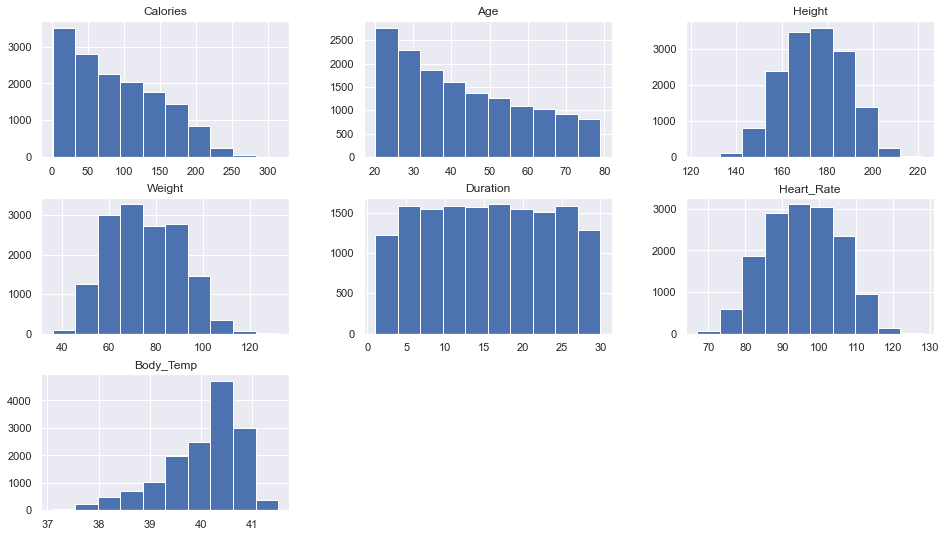

In [24]:
df.hist(figsize=(16,9));

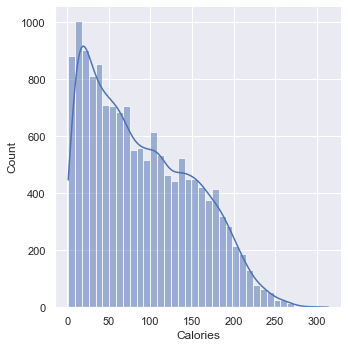

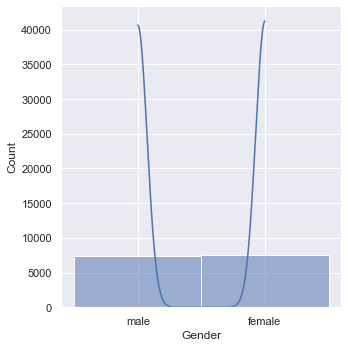

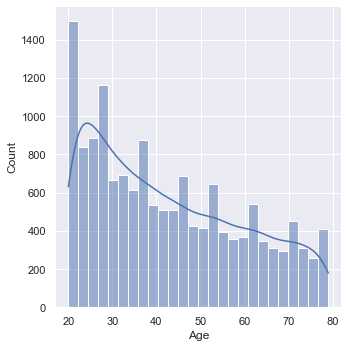

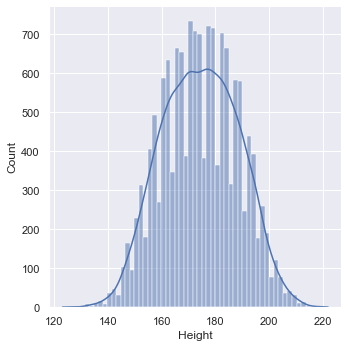

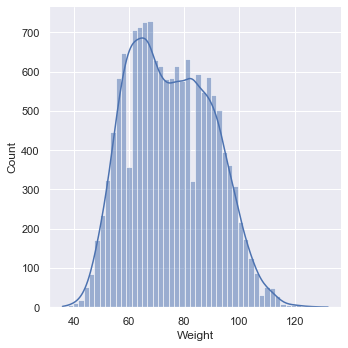

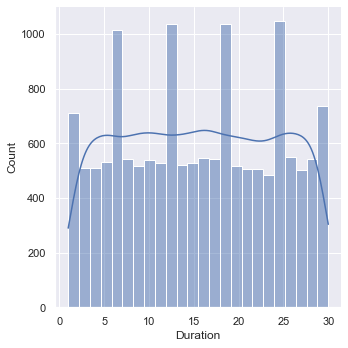

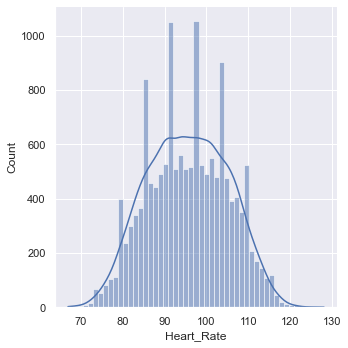

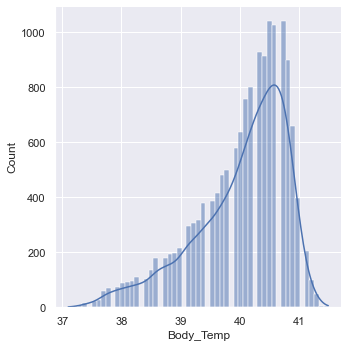

In [25]:
for col in df.columns:
    sns.displot(df[col],kde=True)

# Checking Outlier in Dataset

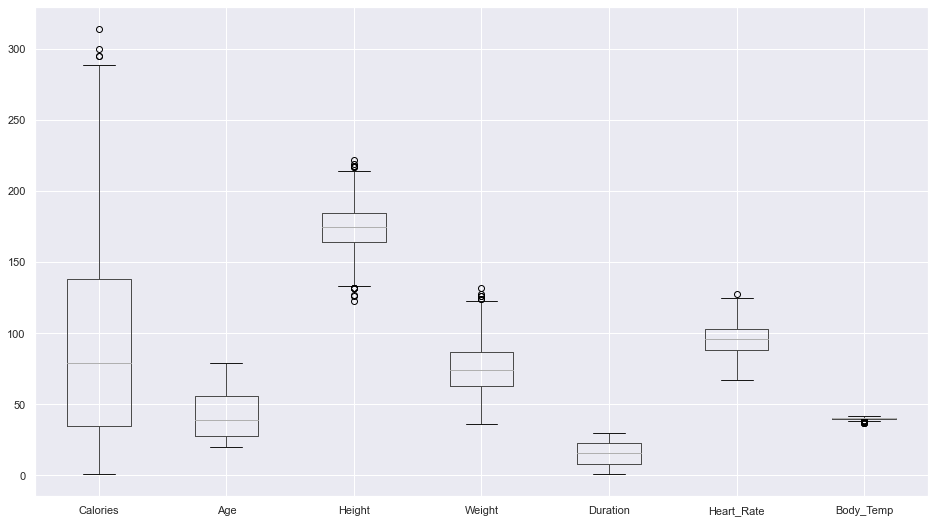

In [26]:
plt.figure(figsize=(16,9))
df.boxplot();

In [27]:
#There is not much outlier excluding Calories

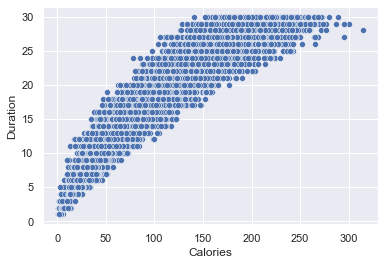

In [28]:
sns.scatterplot(x='Calories',y='Duration',data=df);

# If we will do more exercise then our energy-waste will also increase 

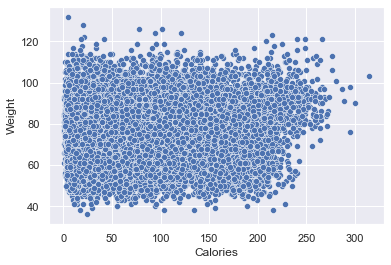

In [29]:
sns.scatterplot(x='Calories',y='Weight',data=df);

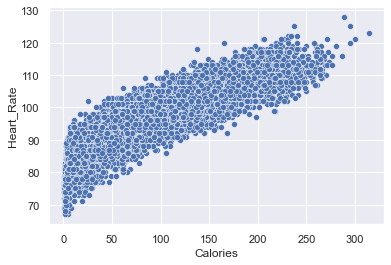

In [30]:
sns.scatterplot(x='Calories',y='Heart_Rate',data=df);

# If Heart_Beat will run fast due to some reason then Energy waste will increase in same proportion too 

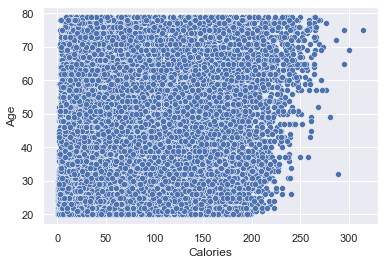

In [31]:
sns.scatterplot(x='Calories',y='Age',data=df);

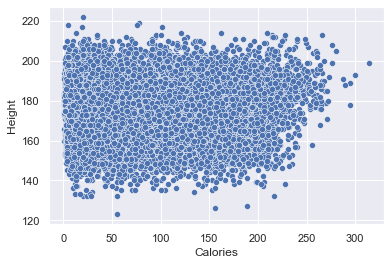

In [32]:
sns.scatterplot(x='Calories',y='Height',data=df);

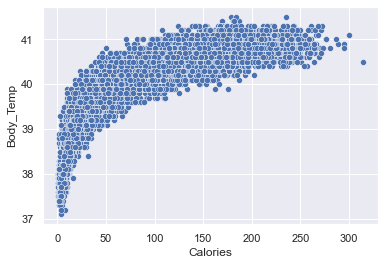

In [33]:
sns.scatterplot(x='Calories',y='Body_Temp',data=df);

# If Body Temprature will be high due to some reason then energy will be released much in same proportion

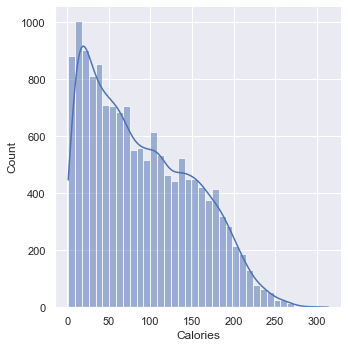

In [34]:
sns.displot(df['Calories'],kde=True);

In [35]:
#Calories needed to be Normal Distribution

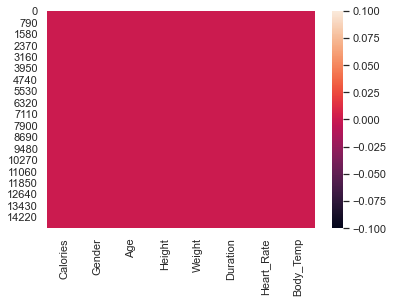

In [36]:
sns.heatmap(df.isnull());

# Bivariate Analysis

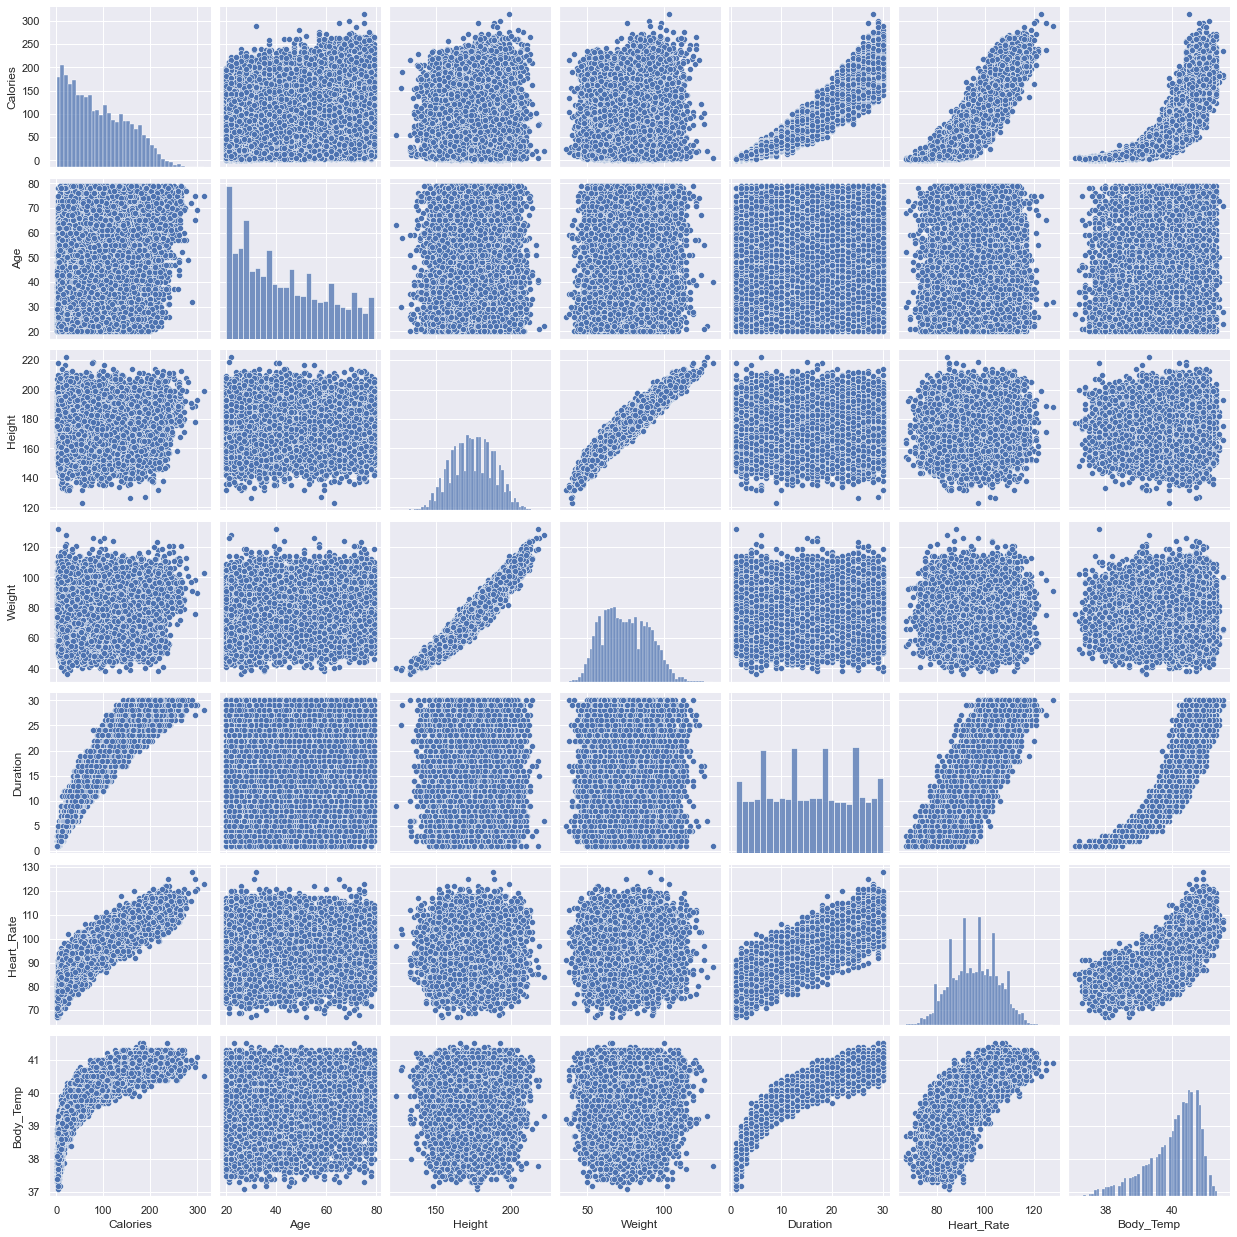

In [37]:
sns.pairplot(data=df);

<AxesSubplot:>

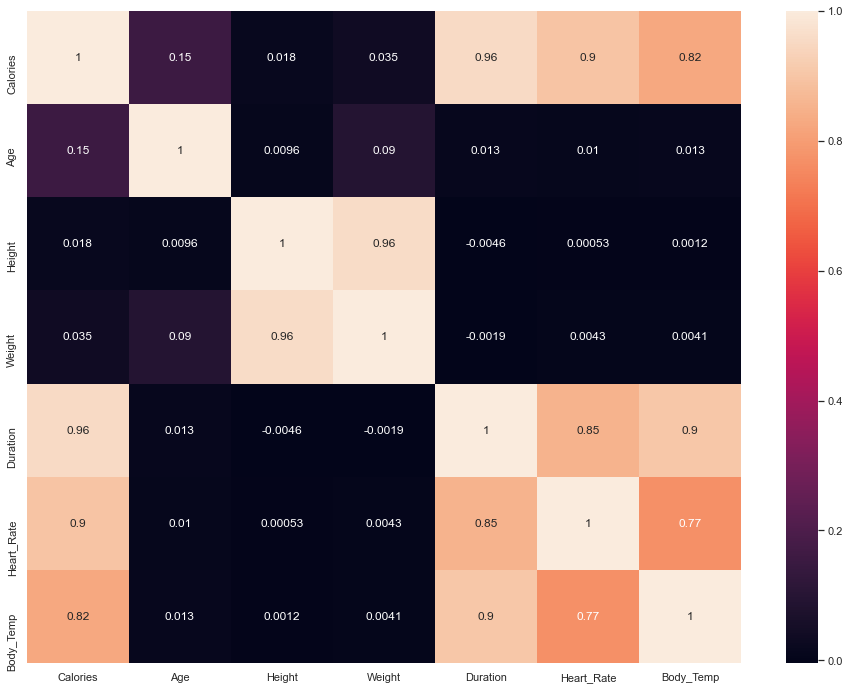

In [38]:
plt.figure(figsize=(16,12));
sns.heatmap(df.corr(),annot=True)

# Height is weakest Col and Duration is highly Correlated

# will Remove Height becoz it is more related with weight and Heart_Rate and Body_Temp becoz it is more related with Duration

In [39]:
df.corr()['Calories']

Calories      1.000000
Age           0.154395
Height        0.017537
Weight        0.035481
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Name: Calories, dtype: float64

# Calories is highly related with Duration ,HeartRate and Body_Temp Features

In [40]:
df.drop(columns=['Height','Heart_Rate','Body_Temp'],axis='columns',inplace=True)

In [41]:
df

,Calories,Gender,Age,Weight,Duration
0,231.0,male,68,94.0,29.0
1,66.0,female,20,60.0,14.0
2,26.0,male,69,79.0,5.0
3,71.0,female,34,71.0,13.0
4,35.0,female,27,58.0,10.0
...,...,...,...,...,...
14995,45.0,female,20,86.0,11.0
14996,23.0,female,27,65.0,6.0
14997,75.0,female,43,58.0,16.0
14998,11.0,male,78,97.0,2.0


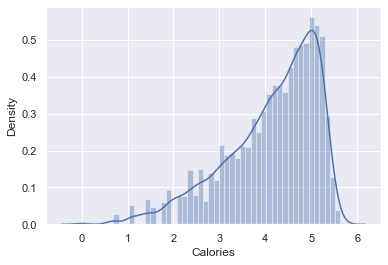

In [42]:
sns.distplot(np.log(df['Calories']));

In [43]:
df['Gender'].replace({'male':0,'female':1},inplace=True)

In [44]:
#Partitioning the dataset into X and y

In [45]:
X = df.drop(columns=['Calories'],axis='columns')

In [46]:
y = np.log(df['Calories'])

In [47]:
X

,Gender,Age,Weight,Duration
0,0,68,94.0,29.0
1,1,20,60.0,14.0
2,0,69,79.0,5.0
3,1,34,71.0,13.0
4,1,27,58.0,10.0
...,...,...,...,...
14995,1,20,86.0,11.0
14996,1,27,65.0,6.0
14997,1,43,58.0,16.0
14998,0,78,97.0,2.0


In [48]:
y

0        5.442418
1        4.189655
2        3.258097
3        4.262680
4        3.555348
           ...   
14995    3.806662
14996    3.135494
14997    4.317488
14998    2.397895
14999    4.584967
Name: Calories, Length: 15000, dtype: float64

# ModelSelection by Cross Validation

# LinearRegression

In [49]:
lr=LinearRegression()

In [50]:
lrv=cross_val_score(lr,X,y,scoring='r2',cv=10,n_jobs=-1)

In [51]:
lrv

array([0.88133577, 0.86126019, 0.86926678, 0.86732386, 0.88266111,
       0.87448501, 0.88088952, 0.89204597, 0.88334621, 0.88155248])

In [52]:
lrv.mean()

0.8774166906354248

# Ridge Regression(l2)

In [53]:
ri=Ridge()

In [54]:
riv=cross_val_score(ri,X,y,scoring='r2',cv=10,n_jobs=-1)

In [55]:
riv

array([0.88133488, 0.86125957, 0.86926702, 0.86732317, 0.88266174,
       0.87448527, 0.8808904 , 0.89204592, 0.88334685, 0.8815525 ])

In [56]:
riv.mean()

0.8774167314492647

# Lasso Regression(l1)

In [57]:
la=Lasso()

In [58]:
lav=cross_val_score(la,X,y,scoring='r2',cv=10,n_jobs=-1)

In [59]:
lav

array([0.86009234, 0.84050197, 0.85196606, 0.84376177, 0.86761453,
       0.8530168 , 0.86676101, 0.8760837 , 0.86721312, 0.86302503])

In [60]:
lav.mean()

0.8590036334669279

# SVM

In [61]:
sv=SVR()

In [62]:
svv=cross_val_score(sv,X,y,scoring='r2',cv=10,n_jobs=-1)

In [63]:
svv

array([0.9539186 , 0.93919654, 0.94904361, 0.94602682, 0.95381294,
       0.95005441, 0.95284945, 0.96198154, 0.95443581, 0.95208099])

In [64]:
svv.mean()

0.9513400713961693

# KNN

In [65]:
kn=KNeighborsRegressor()

In [66]:
knv=cross_val_score(kn,X,y,scoring='r2',cv=10,n_jobs=-1)

In [67]:
knv

array([0.95864933, 0.9424589 , 0.95393578, 0.95265154, 0.95614652,
       0.95870318, 0.95610686, 0.96377774, 0.96012735, 0.95581127])

In [68]:
knv.mean()

0.9558368471746835

# DecisionTreeRegression

In [69]:
dt=DecisionTreeRegressor()

In [70]:
dtv=cross_val_score(dt,X,y,scoring='r2',cv=10,n_jobs=-1)

In [71]:
dtv

array([0.95533937, 0.95229939, 0.9533265 , 0.95419533, 0.95005486,
       0.95131078, 0.94812303, 0.94975524, 0.94965221, 0.94988895])

In [72]:
dtv.mean()

0.9513945654905749

# RandomForestRegression

In [73]:
rf= RandomForestRegressor()

In [74]:
rfv=cross_val_score(rf,X,y,scoring='r2',cv=10,n_jobs=-1)

In [75]:
rfv

array([0.97112279, 0.96617058, 0.97098805, 0.96985286, 0.97159563,
       0.96985806, 0.96660763, 0.97147777, 0.97085097, 0.96835261])

In [76]:
rfv.mean()

0.9696876940966739

# XGBoostRegression

In [77]:
xg=XGBRegressor()

In [78]:
xgv=cross_val_score(xg,X,y,scoring='r2',cv=10,n_jobs=-1)

In [79]:
xgv

array([0.97580018, 0.9696034 , 0.9747697 , 0.97218953, 0.9754649 ,
       0.97375363, 0.97088403, 0.97530492, 0.97466255, 0.97306284])

In [80]:
xgv.mean()

0.9735495700417929

# Plotting All the Algorithms and their corresponding Mean_Score

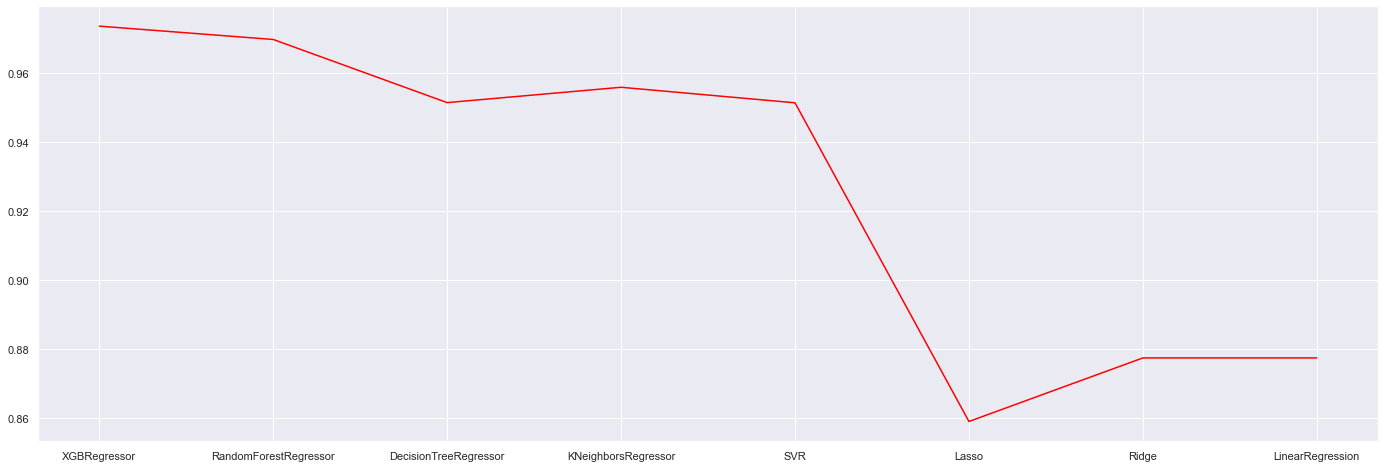

In [81]:
plt.figure(figsize=(24,8))
plt.plot(['XGBRegressor','RandomForestRegressor','DecisionTreeRegressor','KNeighborsRegressor',
          'SVR','Lasso','Ridge','LinearRegression'],
        [xgv.mean(),rfv.mean(),dtv.mean(),knv.mean(),svv.mean(),lav.mean(),riv.mean(),lrv.mean()],color='red')

# Will Select XGBRegressor For Model Building

In [82]:
#Splitting the Data

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [84]:
X_train

,Gender,Age,Weight,Duration
11810,1,38,66.0,27.0
970,1,48,63.0,17.0
1598,0,20,75.0,5.0
11805,0,28,97.0,13.0
2582,0,37,80.0,18.0
...,...,...,...,...
5191,1,75,51.0,22.0
13418,1,21,67.0,20.0
5390,0,57,92.0,8.0
860,0,35,76.0,12.0


In [85]:
X_train.shape

(13500, 4)

In [86]:
X_test

,Gender,Age,Weight,Duration
11499,1,45,52.0,26.0
6475,0,21,90.0,29.0
13167,0,58,77.0,11.0
862,0,35,89.0,24.0
5970,1,67,67.0,29.0
...,...,...,...,...
2655,0,41,84.0,8.0
11672,1,56,61.0,29.0
8990,0,59,82.0,13.0
8517,0,64,93.0,18.0


In [87]:
X_test.shape

(1500, 4)

In [88]:
y_train

11810    5.252273
970      4.317488
1598     2.564949
11805    3.951244
2582     4.709530
           ...   
5191     5.017280
13418    4.736198
5390     3.713572
860      4.043051
7270     4.077537
Name: Calories, Length: 13500, dtype: float64

In [89]:
y_train.shape

(13500,)

In [90]:
y_test

11499    5.153292
6475     5.241747
13167    3.970292
862      5.081404
5970     5.420535
           ...   
2655     3.258097
11672    5.257495
8990     3.970292
8517     4.882802
13492    4.882802
Name: Calories, Length: 1500, dtype: float64

In [91]:
y_test.shape

(1500,)

In [92]:
#Validation Data

In [93]:
X_train_val,X_test_val,y_train_val,y_test_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [94]:
X_train_val

,Gender,Age,Weight,Duration
10333,1,42,75.0,30.0
12874,1,26,54.0,18.0
12218,1,70,86.0,28.0
198,0,66,72.0,18.0
14724,1,50,65.0,4.0
...,...,...,...,...
5362,0,24,75.0,20.0
3943,1,74,62.0,26.0
9712,0,29,75.0,9.0
12551,1,22,62.0,6.0


In [95]:
X_train_val.shape

(12150, 4)

In [96]:
X_test_val

,Gender,Age,Weight,Duration
420,1,20,58.0,5.0
3506,1,33,60.0,25.0
14252,1,54,61.0,30.0
13764,0,35,86.0,8.0
3249,0,69,76.0,4.0
...,...,...,...,...
10292,0,27,98.0,24.0
12705,0,48,90.0,14.0
1732,1,34,63.0,29.0
7416,1,48,59.0,13.0


In [97]:
X_test_val.shape

(1350, 4)

In [98]:
y_train_val

10333    5.288267
12874    4.653960
12218    5.117994
198      4.890349
14724    2.833213
           ...   
5362     4.510860
3943     5.159055
9712     3.555348
12551    3.091042
3899     3.401197
Name: Calories, Length: 12150, dtype: float64

In [99]:
y_train_val.shape

(12150,)

# Model Building and Tuning With validation data on XGBoost algo

In [100]:
xgr=XGBRegressor()

In [101]:
xgr.fit(X_train_val,y_train_val)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [102]:
#prediction on Training Validation data

In [103]:
y_train_val_pred=xgr.predict(X_train_val)

In [104]:
y_train_val_pred

array([5.280671 , 4.532454 , 5.175966 , ..., 3.37518  , 3.0642817,
       3.4539645], dtype=float32)

In [105]:
r2_score(y_train_val,y_train_val_pred)

0.9849041539854981

In [106]:
#prediction on Testing Validation data

In [107]:
y_test_val_pred=xgr.predict(X_test_val)

In [108]:
y_test_val_pred

array([2.896399 , 5.0542436, 5.312234 , ..., 5.2265306, 4.2238383,
       4.766649 ], dtype=float32)

In [109]:
r2_score(y_test_val,y_test_val_pred)

0.9736540971399396

In [114]:
rfra=RandomForestRegressor()

In [115]:
rfra.fit(X_train_val,y_train_val)

RandomForestRegressor()

In [116]:
y_test_pred=rfra.predict(X_test)

In [117]:
r2_score(y_test,y_test_pred)

0.9697100152850324

# Model Tuning by GridSearchCV

In [299]:
params={'n_estimators':[120,90,150],'max_depth':[20,10],'learning_rate':[0.1,0.4,0.03],
        'reg_lambda':[0.8,2],'gamma':[1,2,0.5],'min_child_weight':[2,3],'reg_alpha':[0.5,.2]}

In [300]:
xgg=XGBRegressor()

In [301]:
xggs=GridSearchCV(xgg,params,cv=10,scoring='r2',n_jobs=-1)

In [ ]:
xggs.fit(X_train_val,y_train_val)

In [ ]:
print("\n The best estimator across ALL searched params:\n",xggs.best_estimator_)
print("\n The best score across ALL searched params:\n",xggs.best_score_)
print("\n The best parameters across ALL searched params:\n",xggs.best_params_)

In [ ]:
# Finally Model Building 

In [ ]:
xgm=XGBRegressor(gamma=0.5, learning_rate= 0.1, 
                 max_depth= 10, min_child_weight= 2, n_estimators= 120, reg_alpha=0.2, reg_lambda= 2)

In [ ]:
xgm.fit(X_train_val,y_train_val)

In [ ]:
# Finally Evaluating the model on Test Data

In [ ]:
y_test_pred=xgm.predict(X_test)

In [ ]:
r2_score(y_test,y_test_pred)

In [ ]:
print("MeanSquaredError(MSE)" ,mean_squared_error(y_test,y_test_pred))

In [ ]:
print("MeanAbsoluteError(MAE)",mean_absolute_error(y_test,y_test_pred))

# Dump the model for Deployment

In [118]:
import pickle

In [119]:
pickle.dump(rfra,open('Calbuntrfmodel.pkl','wb'))